## Time-Frequncy Domain

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

In [2]:
4096/48000

0.08533333333333333

In [3]:
datas, labels

(array([[-0.04109723, -0.046104  , -0.02837169, ...,  0.01460308,
          0.01189108,  0.01001354],
        [-0.00396369, -0.03150092, -0.05736923, ...,  0.05611754,
         -0.01460308, -0.09450277],
        [-0.14540492, -0.17419385, -0.17690585, ..., -0.024408  ,
         -0.09679754, -0.15437538],
        ...,
        [-0.07845867, -0.115184  , -0.16192533, ..., -0.21450933,
         -0.23454133, -0.227864  ],
        [-0.210336  , -0.15441333, -0.067608  , ...,  0.10600267,
          0.15942133,  0.20365867],
        [ 0.242888  ,  0.257912  ,  0.24121867, ...,  0.05675733,
          0.05174933,  0.04089867]]),
 array(['Ball_007', 'Ball_007', 'Ball_007', ..., 'OR_021', 'OR_021',
        'OR_021'], dtype='<U8'))

In [4]:
datas.shape

(1150, 4096)

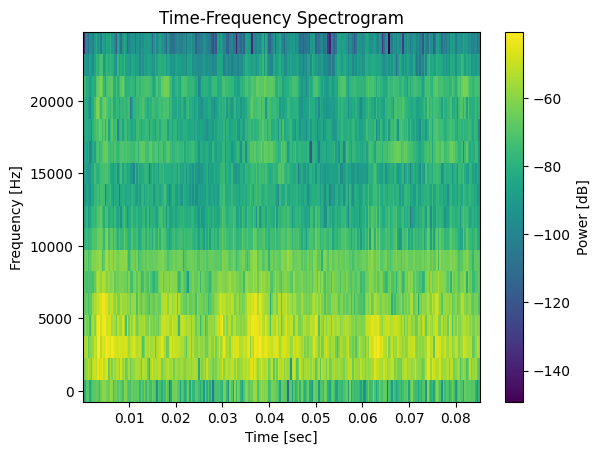

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# 假設 datas 是你的原始震動資料 (1150, 4096)
datas = read_online_data['datas']

# 設定 STFT 的參數
nperseg = 32   # 完整的資料段長度
noverlap = nperseg/2 # 50% 重疊

# 使用 scipy 的 spectrogram 函數來計算 STFT
f, t, Sxx = spectrogram(datas[500], fs=48000, nperseg=nperseg, noverlap=noverlap)

# Sxx 是每個時間點的頻譜強度（時頻圖），f 是頻率軸，t 是時間軸

# 可視化某個資料點的時頻圖
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')  # 轉換為 dB scale
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Time-Frequency Spectrogram')
plt.colorbar(label='Power [dB]')
plt.show()

In [6]:
f.shape, t.shape, Sxx.shape

((17,), (255,), (17, 255))

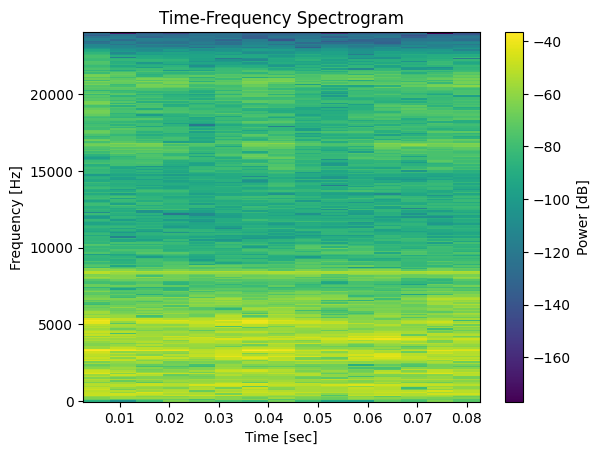

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# 假設 datas 是你的原始震動資料 (1150, 4096)
datas = read_online_data['datas']

# 設定 STFT 的參數
nperseg = 512   # 完整的資料段長度
noverlap = nperseg/2 # 50% 重疊

# 使用 scipy 的 spectrogram 函數來計算 STFT
f, t, Sxx = spectrogram(datas[500], fs=48000, nperseg=nperseg, noverlap=noverlap)

# Sxx 是每個時間點的頻譜強度（時頻圖），f 是頻率軸，t 是時間軸

# 可視化某個資料點的時頻圖
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')  # 轉換為 dB scale
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Time-Frequency Spectrogram')
plt.colorbar(label='Power [dB]')
plt.show()

In [8]:
f.shape, t.shape, Sxx.shape

((257,), (15,), (257, 15))

## Wavelet packet energy features

In [ ]:
import numpy as np
import pywt

# 設定小波包變換的參數
wavelet = 'db1'  # 使用 Daubechies 1 (db1) 小波
max_level = 4    # 設定分解的層數

# 初始化一個空的數組來存儲每個樣本的能量特徵
energy_features = []

# 進行小波包分解
for signal in datas:
    # 進行小波包分解
    wp = pywt.WaveletPacket(data=signal, wavelet=wavelet, mode='symmetric', maxlevel=max_level)
    
    # 提取各頻帶的能量
    energy = []
    for node in wp.get_level(max_level, 'freq'):
        # 計算每個子頻帶的能量（平方和）
        energy.append(np.sum(np.square(node.data)))
    
    # 把每個樣本的能量特徵加入到列表中
    energy_features.append(energy)

# 轉換成 numpy array，維度為 (1150, N)，其中 N 是頻帶數量
energy_features = np.array(energy_features)

print(f"能量特徵的維度: {energy_features.shape}")

In [10]:
energy_features.shape

(1150, 16)

In [29]:
import pandas as pd

# 創建 DataFrame
df = pd.DataFrame(energy_features, columns=[f'WaveletPacket_energy_{i+1}' for i in range(16)])

# 新增 labels 欄位
df['fault'] = labels

# 顯示 DataFrame 的前幾列
df.head()

WaveletPacket_energy_1  WaveletPacket_energy_2  WaveletPacket_energy_3  \
0                7.336071               23.706495               25.101299   
1                8.123839               37.752114               35.326173   
2                7.766909               31.640267               26.541737   
3                7.300931               36.479621               27.963217   
4                7.467604               29.503702               31.730280   

   WaveletPacket_energy_4  WaveletPacket_energy_5  WaveletPacket_energy_6  \
0                0.947163                0.171041                4.215579   
1                0.914223                0.194782                6.056222   
2                1.091640                0.205037                5.537604   
3                0.959463                0.226046                6.192925   
4                0.869548                0.184793                4.529561   

   WaveletPacket_energy_7  WaveletPacket_energy_8  WaveletPacket_energy_9  \
0                4.326426                0.175201                0.009637   
1                6.133845                0.174044                0.009712   
2                4.545664                0.195952                0.009995   
3                4.798545                0.171362                0.010964   
4                5.520629                0.166281                0.010583   

   WaveletPacket_energy_10  WaveletPacket_energy_11  WaveletPacket_energy_12  \
0                 0.177191                 0.233211                 0.015357   
1                 0.249728                 0.285379                 0.014527   
2                 0.235927                 0.250980                 0.016408   
3                 0.250798                 0.253527                 0.017293   
4                 0.201802                 0.267070                 0.015736   

   WaveletPacket_energy_13  WaveletPacket_energy_14  WaveletPacket_energy_15  \
0                 0.037350                 0.959629                 0.986884   
1                 0.041745                 1.373088                 1.411767   
2                 0.043975                 1.263271                 1.034690   
3                 0.048711                 1.400649                 1.097694   
4                 0.038658                 1.034721                 1.264891   

   WaveletPacket_energy_16     fault  
0                 0.040206  Ball_007  
1                 0.039681  Ball_007  
2                 0.045175  Ball_007  
3                 0.038423  Ball_007  
4                 0.037842  Ball_007

In [30]:
df.to_pickle("datas/48k_DE_load1_segment4096_overlap0_TFDFeature.pkl")

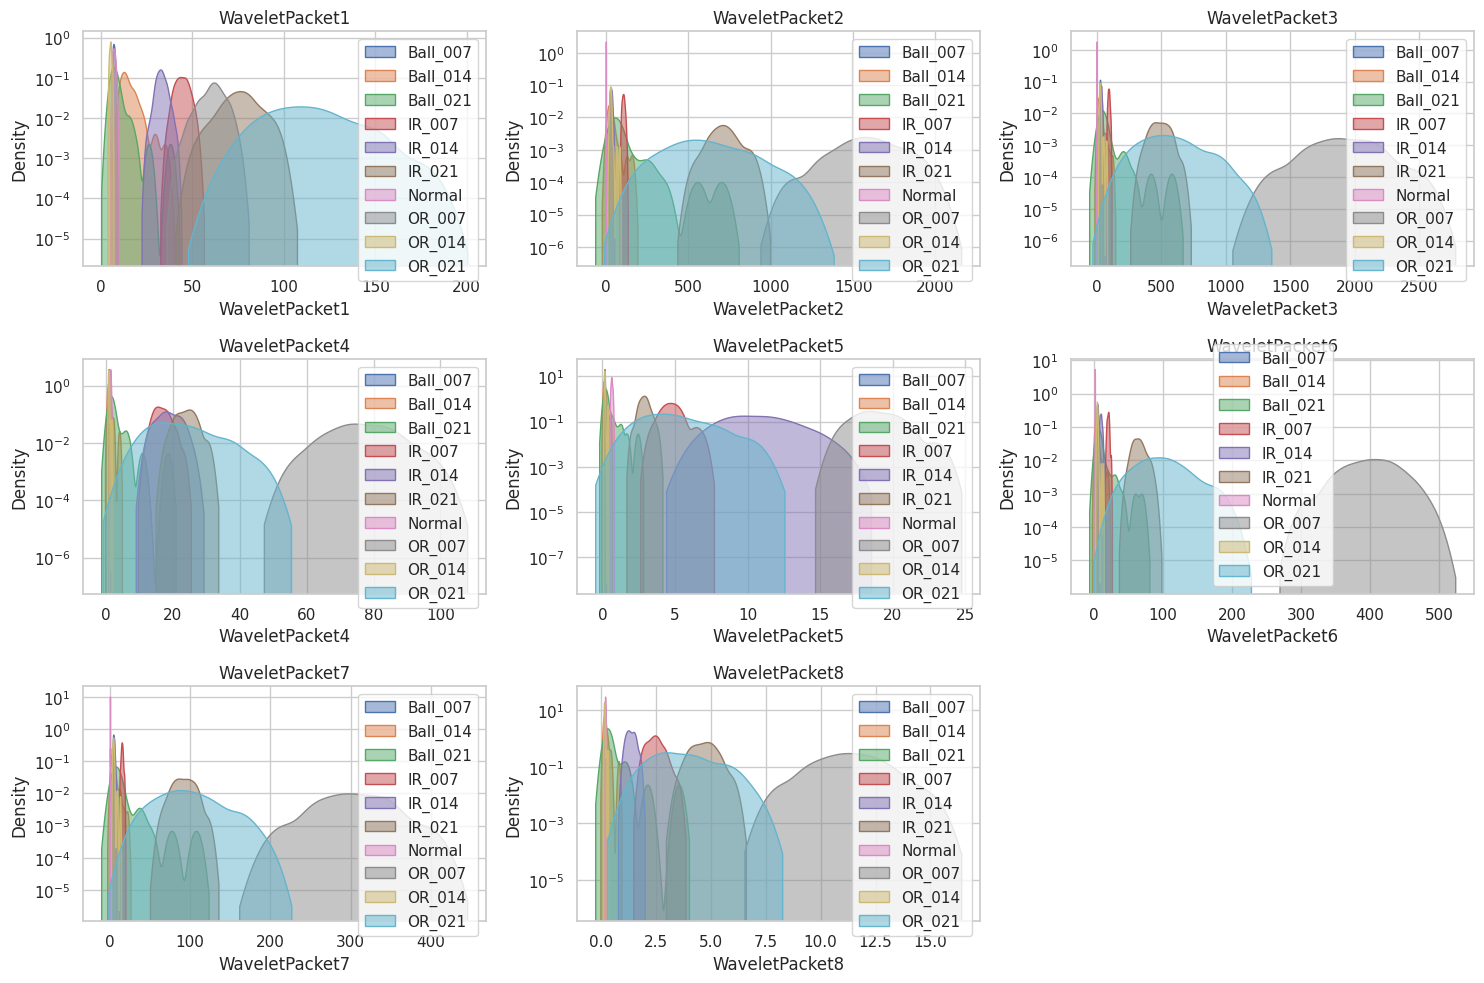

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:8], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    
    for fault_label in df1["fault"].unique():
        subset = df1[df1["fault"] == fault_label]
        sns.kdeplot(subset[col], label=f"{fault_label}", fill=True, alpha=0.5)
    
    plt.title(col)
    plt.legend()

    # 設定 y 軸為對數刻度
    plt.yscale('log')

plt.tight_layout()
plt.show()

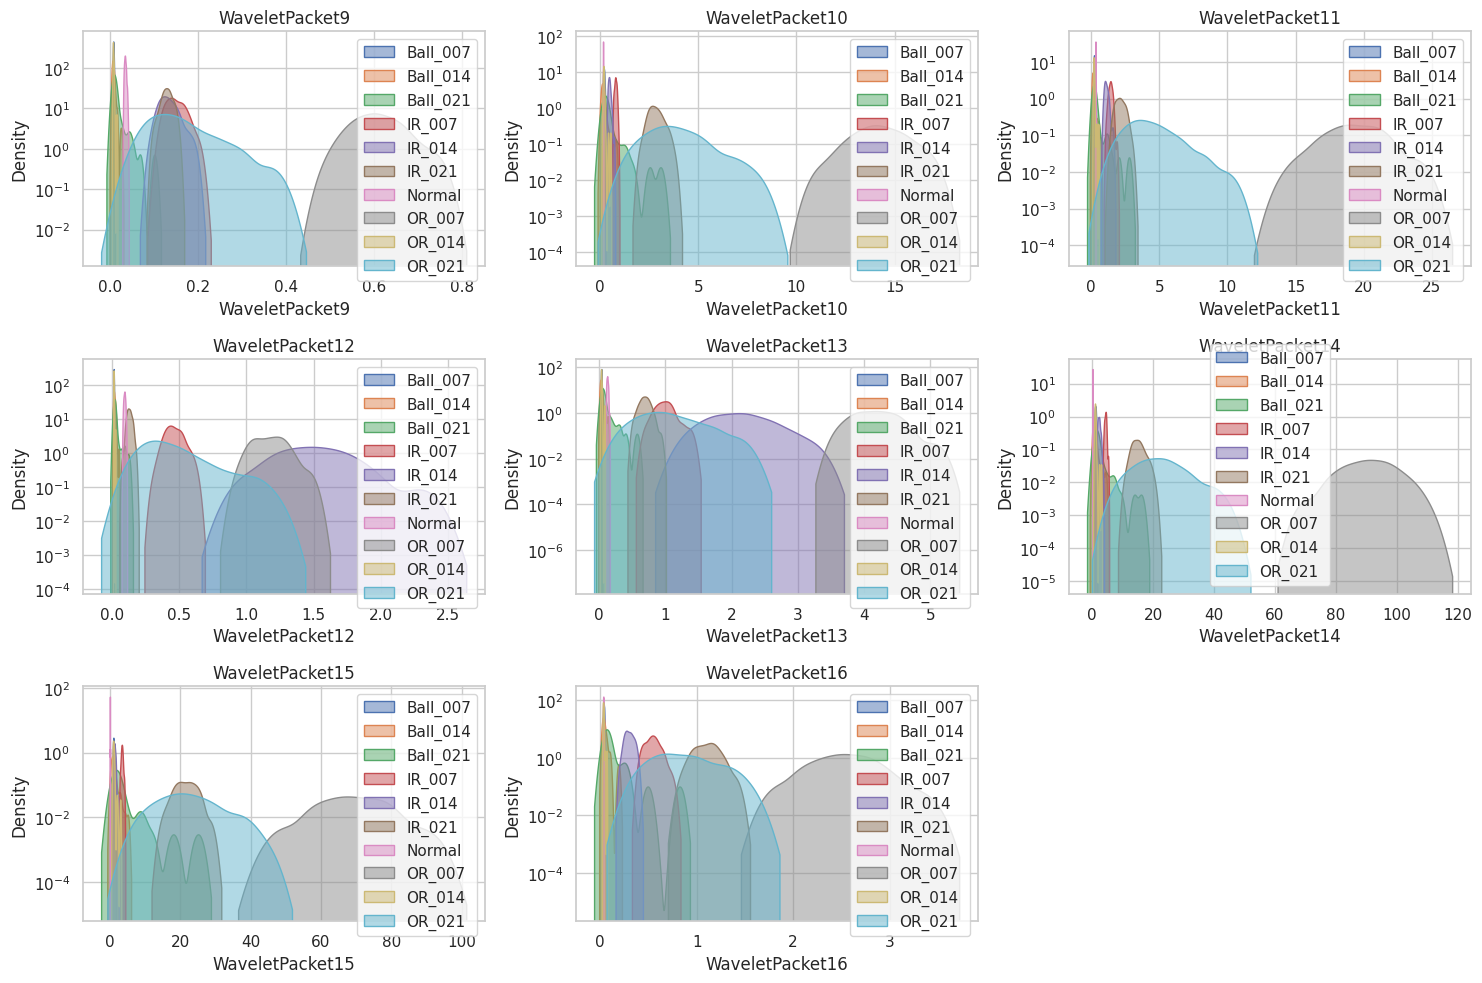

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[8:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    
    for fault_label in df1["fault"].unique():
        subset = df1[df1["fault"] == fault_label]
        sns.kdeplot(subset[col], label=f"{fault_label}", fill=True, alpha=0.5)
    
    plt.title(col)
    plt.legend()
    
    plt.yscale('log')

plt.tight_layout()
plt.show()

In [32]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(df.iloc[:, :-1])

# PCA 降維到 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 3D
tsne = TSNE(n_components=3, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 3D 視覺化函數
def plot_3d_embedding(embedding, labels, title):
    # 使用 Plotly Express 進行 3D 散點圖繪製
    df = pd.DataFrame(embedding, columns=['Dim 1', 'Dim 2', 'Dim 3'])
    df['Label'] = labels
    fig = px.scatter_3d(df, x='Dim 1', y='Dim 2', z='Dim 3', color='Label', title=title)
    
    # 設定 marker 大小，調整點的大小
    fig.update_traces(marker=dict(size=3))  # 將點的大小設為 3
    fig.show()

# 視覺化 PCA
plot_3d_embedding(pca_result, labels, "PCA 3D Visualization")

# 視覺化 t-SNE
plot_3d_embedding(tsne_result, labels, "t-SNE 3D Visualization")

## Wavelet packet entropy features

In [1]:
import numpy as np
import pandas as pd

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

In [2]:
import numpy as np
import pywt
from scipy.stats import entropy

def wavelet_packet_entropy(data, wavelet='db4', level=4):
    # 進行小波包分解
    wp = pywt.WaveletPacket(data, wavelet=wavelet, mode='symmetric', maxlevel=level)
    # 獲取所有子頻帶的節點
    nodes = wp.get_level(level, 'freq')
    # 初始化熵值列表
    entropies = []
    for node in nodes:
        # 獲取每個子頻帶的係數
        coeffs = node.data
        # 計算每個子頻帶的熵
        ent = entropy(np.abs(coeffs))
        entropies.append(ent)
    return np.array(entropies)

# 假設 datas 是形狀為 (1150, 4096) 的 numpy 陣列
# 初始化熵特徵矩陣
entropy_features = np.zeros((datas.shape[0], 2**4))  # 2^4 = 16 個子頻帶
for i, signal in enumerate(datas):
    entropy_features[i, :] = wavelet_packet_entropy(signal)

In [3]:
entropy_features.sum()

94613.52194310332

In [4]:
entropy_features.shape

(1150, 16)

In [6]:
import pandas as pd

# 創建 DataFrame
df = pd.DataFrame(entropy_features, columns=[f'WaveletPacket_entropy_{i+1}' for i in range(16)])

# 新增 labels 欄位
df['fault'] = labels

# 顯示 DataFrame 的前幾列
df.head()

WaveletPacket_entropy_1  WaveletPacket_entropy_2  WaveletPacket_entropy_3  \
0                 5.323831                 5.258094                 5.258014   
1                 5.313043                 5.213842                 5.315494   
2                 5.269723                 5.247594                 5.270265   
3                 5.249197                 5.237496                 5.241058   
4                 5.282239                 5.300820                 5.314177   

   WaveletPacket_entropy_4  WaveletPacket_entropy_5  WaveletPacket_entropy_6  \
0                 5.216405                 5.285261                 5.285753   
1                 5.146298                 5.121635                 5.307296   
2                 4.953902                 5.202754                 5.262894   
3                 5.182079                 5.275027                 5.279031   
4                 5.251468                 5.237230                 5.301234   

   WaveletPacket_entropy_7  WaveletPacket_entropy_8  WaveletPacket_entropy_9  \
0                 5.264396                 5.109756                 5.216227   
1                 5.321502                 4.916472                 5.145964   
2                 5.305687                 4.883819                 5.209665   
3                 5.295834                 5.048576                 5.232877   
4                 5.308583                 4.996243                 5.249876   

   WaveletPacket_entropy_10  WaveletPacket_entropy_11  \
0                  5.334709                  5.390452   
1                  5.354223                  5.395037   
2                  5.364869                  5.370305   
3                  5.301424                  5.383216   
4                  5.354597                  5.400978   

   WaveletPacket_entropy_12  WaveletPacket_entropy_13  \
0                  5.242871                  5.247148   
1                  5.218054                  5.306349   
2                  5.281976                  5.249022   
3                  5.291251                  5.266553   
4                  5.201755                  5.274381   

   WaveletPacket_entropy_14  WaveletPacket_entropy_15  \
0                  5.295364                  5.215719   
1                  5.282951                  5.303122   
2                  5.310971                  5.306228   
3                  5.256411                  5.258600   
4                  5.273802                  5.287156   

   WaveletPacket_entropy_16     fault  
0                  4.949625  Ball_007  
1                  5.128938  Ball_007  
2                  4.731380  Ball_007  
3                  5.211566  Ball_007  
4                  4.862666  Ball_007

In [7]:
df.to_pickle("datas/48k_DE_load1_segment4096_overlap0_TFDFeature_entropy.pkl")

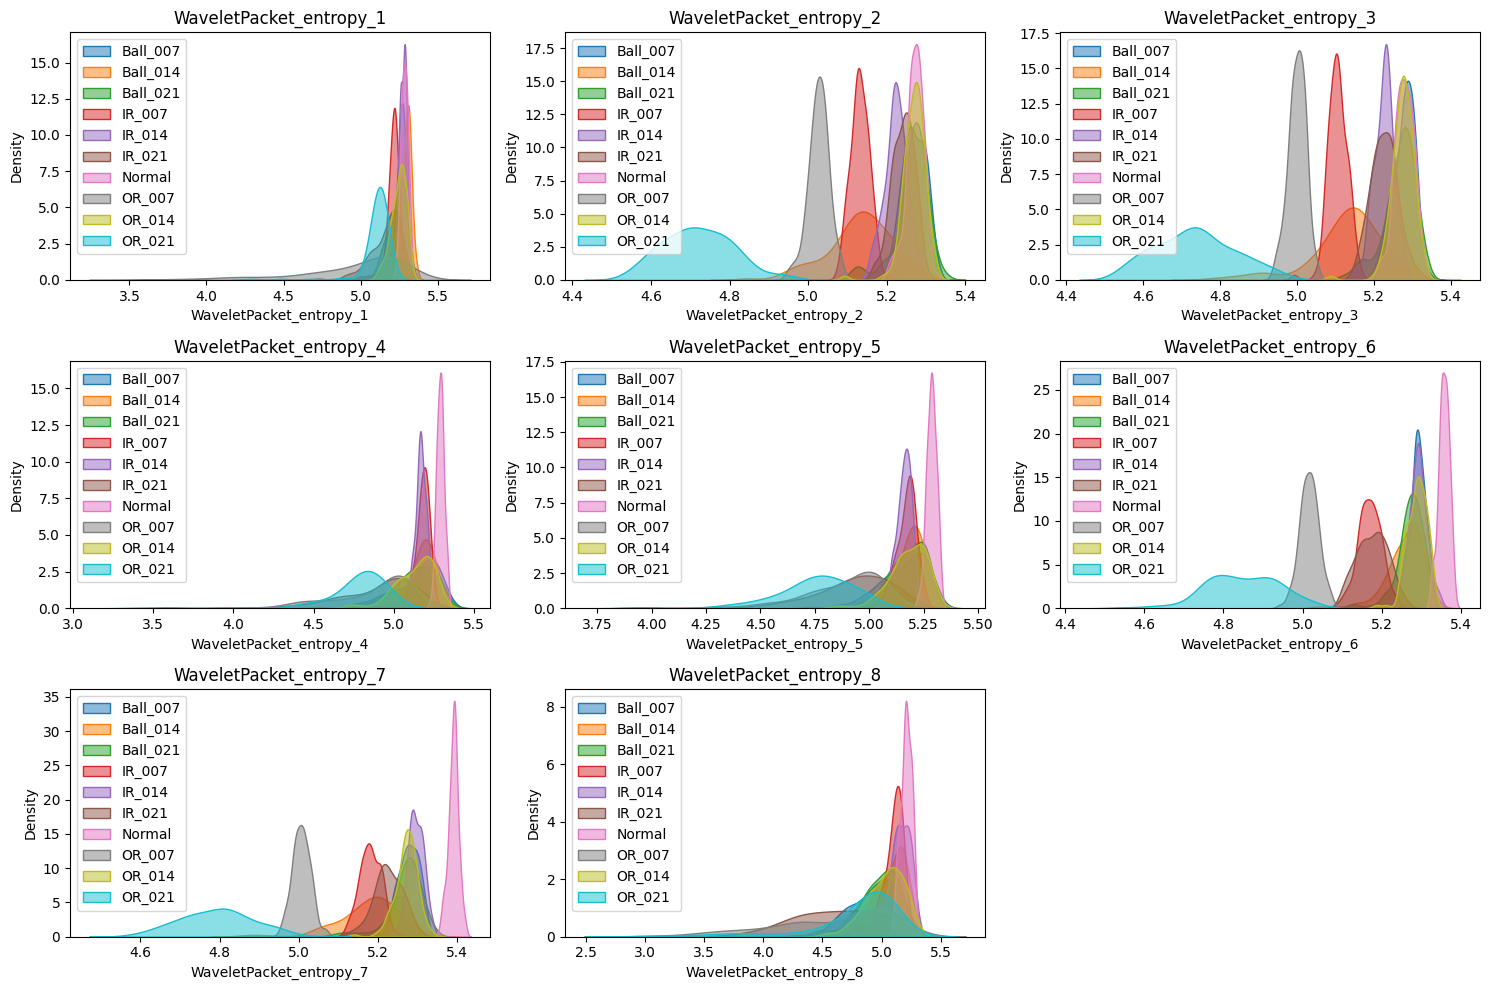

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:8], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    
    for fault_label in df1["fault"].unique():
        subset = df1[df1["fault"] == fault_label]
        sns.kdeplot(subset[col], label=f"{fault_label}", fill=True, alpha=0.5)
    
    plt.title(col)
    plt.legend()

    # 設定 y 軸為對數刻度
    # plt.yscale('log')

plt.tight_layout()
plt.show()

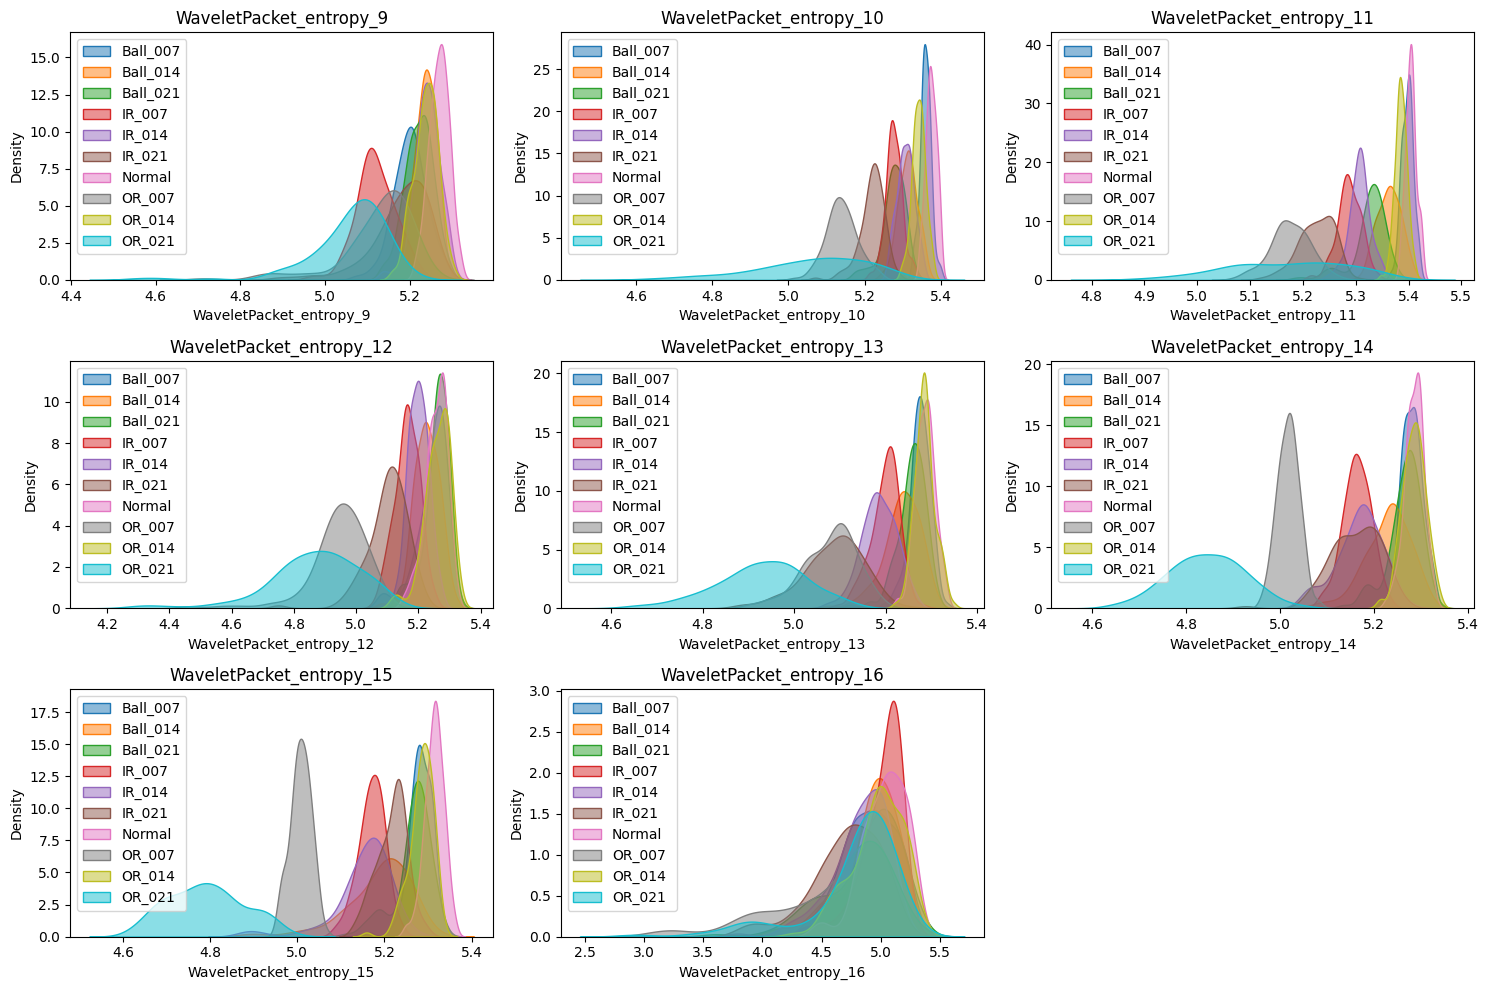

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[8:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    
    for fault_label in df1["fault"].unique():
        subset = df1[df1["fault"] == fault_label]
        sns.kdeplot(subset[col], label=f"{fault_label}", fill=True, alpha=0.5)
    
    plt.title(col)
    plt.legend()
    
    # plt.yscale('log')

plt.tight_layout()
plt.show()

In [11]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(df.iloc[:, :-1])

# PCA 降維到 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 3D
tsne = TSNE(n_components=3, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 3D 視覺化函數
def plot_3d_embedding(embedding, labels, title):
    # 使用 Plotly Express 進行 3D 散點圖繪製
    df = pd.DataFrame(embedding, columns=['Dim 1', 'Dim 2', 'Dim 3'])
    df['Label'] = labels
    fig = px.scatter_3d(df, x='Dim 1', y='Dim 2', z='Dim 3', color='Label', title=title)
    
    # 設定 marker 大小，調整點的大小
    fig.update_traces(marker=dict(size=3))  # 將點的大小設為 3
    fig.show()

# 視覺化 PCA
plot_3d_embedding(pca_result, labels, "PCA 3D Visualization")

# 視覺化 t-SNE
plot_3d_embedding(tsne_result, labels, "t-SNE 3D Visualization")

In [13]:
import plotly.io as pio
pio.renderers.default = "vscode+notebook"
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(df.iloc[:, :-1])

# PCA 降維到 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 3D
tsne = TSNE(n_components=3, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 3D 視覺化函數
def plot_3d_embedding(embedding, labels, title):
    # 使用 Plotly Express 進行 3D 散點圖繪製
    df = pd.DataFrame(embedding, columns=['Dim 1', 'Dim 2', 'Dim 3'])
    df['Label'] = labels
    fig = px.scatter_3d(df, x='Dim 1', y='Dim 2', z='Dim 3', color='Label', title=title)
    
    # 設定 marker 大小，調整點的大小
    fig.update_traces(marker=dict(size=3))  # 將點的大小設為 3
    fig.show()

# 視覺化 PCA
plot_3d_embedding(pca_result, labels, "PCA 3D Visualization")

# 視覺化 t-SNE
plot_3d_embedding(tsne_result, labels, "t-SNE 3D Visualization")